In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

df = pd.read_csv('Titanic_dataset.csv')
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [95]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [37]:
# We have 891 rows and 12 column 
# PassengerId - There is no missing value رقم تعريف الراكب
# Pclass - There is no missing value درجة التذكرة (1، 2، 3)
# Survived إذا كان الراكب نجا أو لا)
# Name - There is no missing value اسم الراكب
# Sex - There is no missing value جنس الراكب
# Age - 891-714 = There is 177 rows عمر الراكب
# SibSp - There is no missing value  # عدد الاخوة او الازواج
# Parch - There is no missing value  # عدد الآباء/الأبناء على متن السفينة
# Ticket -  There is no missing value رقم التذكرة 
# Fare - There is no missing value سعر التذكرة
# Cabin - 891-204 = There is 687 rows رقم المقصورة
# Embarked - We have just two missing value ميناء الصعود


In [97]:
df.head(10).isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


In [98]:
df = df.dropna(axis = 0, how= "any")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


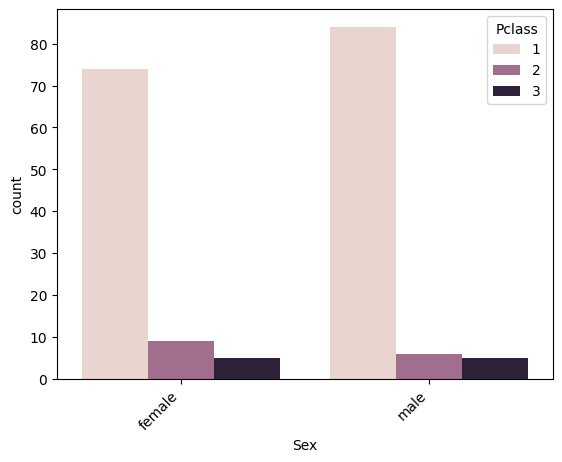

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Sex', hue='Pclass')
plt.xticks(rotation=45, ha='right')
plt.show()

In [181]:
pre_df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)


In [161]:
df_cleaned = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
df_cleaned = df_cleaned.dropna(subset=['Age', 'Fare'])

In [165]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Pclass', axis=1)  # افترض أن الهدف هو 'Pclass'
y = df_encoded['Pclass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=125)


In [166]:
# الخطوة 1: نشوف معلومات البيانات
print("Data Columns and Types:")
print(df.dtypes)


# الخطوة 2: نحذف الأعمدة اللي مالها داعي ونتعامل مع القيم الناقصة


# نتأكد من عدد الصفوف والأعمدة بعد التنظيف
print("\nData Shape After Cleaning:", df_cleaned.shape)

# الخطوة 3: تحويل الأعمدة النصية إلى أرقام باستخدام one-hot encoding
df_encoded = pd.get_dummies(df_cleaned, columns=['Sex', 'Embarked'], drop_first=True)

# الخطوة 5: تجهيز وتشغيل نموذج Gaussian Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# تأكيد إتمام عملية التدريب
print("Model fitting completed successfully.")

Data Columns and Types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Data Shape After Cleaning: (183, 8)
Model fitting completed successfully.


In [167]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.819672131147541
F1 Score: 0.8505674653215637


/tmp/ipykernel_2533/2018687871.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)  # Fill missing Age values with median
/tmp/ipykernel_2533/2018687871.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

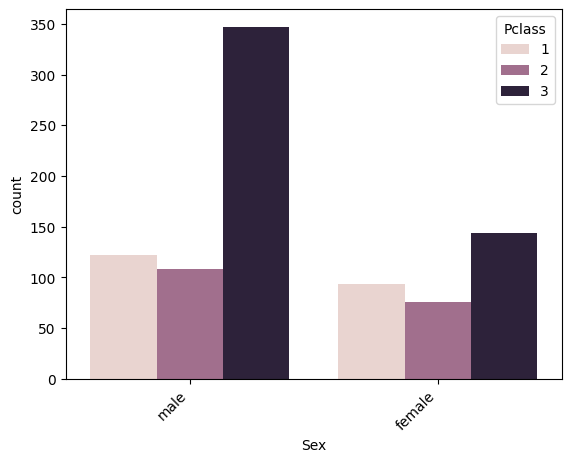

Model fitting completed successfully.
Accuracy: 0.819672131147541
F1 Score: 0.8505674653215637


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [179]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

titanic_df = pd.read_csv('Titanic_dataset.csv')


# Handle missing values
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)  # Fill missing Age values with median
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)  # Fill missing Embarked with mode
titanic_df['Cabin'].fillna(titanic_df['Cabin'].mode()[0], inplace=True)  # Fill missing Cabin with mode


import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Sex', hue='Pclass')
plt.xticks(rotation=45, ha='right')
plt.show()


from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=125)


# الخطوة 5: تجهيز وتشغيل نموذج Gaussian Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# تأكيد إتمام عملية التدريب
print("Model fitting completed successfully.")


from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)

titanic_df